In [2]:
import cv2 as cv
import random
import numpy as np
import sklearn as sk
import math
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Sobel Y')

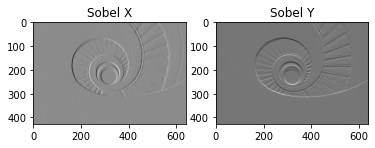

In [3]:
img = cv.imread("spiral.jpg")
bwimg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
dst = cv.GaussianBlur(bwimg, (3,3), cv.BORDER_DEFAULT)

sobelx = cv.Sobel(dst, cv.CV_64F,1,0,ksize=3)
sobely = cv.Sobel(dst, cv.CV_64F,0,1,ksize=3)

plt.subplot(1,2,1),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X')
plt.subplot(1,2,2),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y')

In [4]:
G = np.zeros(img.shape, np.uint8)

Text(0.5, 1.0, 'Gradient Image')

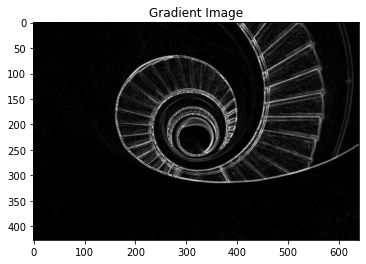

In [5]:
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        G[i][j] = math.sqrt((sobelx[i][j])**2 + (sobely[i][j])**2)
G = cv.cvtColor(G, cv.COLOR_BGR2GRAY)
plt.imshow(G, cmap = 'gray')
plt.title("Gradient Image")


In [6]:
def set_T(T):
    T = cv.getTrackbarPos("T", "Staircase")

In [14]:
def general_edge_detection(T, temp):
    temp = G.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if(temp[i][j] > T):
                temp[i][j] = 255
            else:
                temp[i][j] = 0
    return temp

In [7]:
temp = G.copy()
T = 0
cv.imshow("Staircase", temp)
cv.createTrackbar("T", "Staircase", 1, 100, set_T)
while True:
    cv.imshow("Staircase", temp)
    key=cv.waitKey(1)
    if key==27: #if key pressed is esc
        break
    if key==13: #if key pressed is Enter
        T = cv.getTrackbarPos("T","Staircase")
        temp = G.copy()
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if(temp[i][j] > T):
                    temp[i][j] = 255
                else:
                    temp[i][j] = 0
cv.destroyAllWindows()

In [8]:
def set_T1(*args):
    T = cv.getTrackbarPos("T", "Controls")

In [9]:
def set_T2(*args):
    T = cv.getTrackbarPos("T", "Controls")

In [10]:
img = cv.imread("spiral.jpg")
test = img.copy()
T1 = 0
T2 = 0
cv.imshow("Staircase", test)
cv.createTrackbar("T1", "Staircase", 1, 100, set_T1)
cv.createTrackbar("T2", "Staircase", 1, 100, set_T2)
while True:
    cv.imshow("Staircase", test)
    key=cv.waitKey(1)
    if key==27: #if key pressed is esc
        break
    if key==13: #if key pressed is Enter
        T1 = cv.getTrackbarPos("T1", "Staircase")
        T2 = cv.getTrackbarPos("T2", "Staircase")
        test = cv.Canny(img, T1, T2)
cv.destroyAllWindows()

Text(0.5, 1.0, 'Test Image')

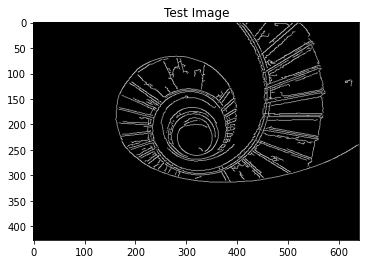

In [40]:
img = cv.imread("spiral.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.GaussianBlur(img, (7,3), cv.BORDER_DEFAULT)
test = cv.Canny(img, 7, 51)

plt.imshow(test, cmap = 'gray')
plt.title("Test Image")

In [18]:
totalp = img.shape[0] * img.shape[1]
for T in range(100):
    temp = G.copy()
    temp = general_edge_detection(T, temp)
    sameCtr = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if (temp[i][j] == test[i][j]):
                sameCtr += 1
    similarity = sameCtr/totalp
    print(str(T) + ": " + str(similarity))

0: 0.4156981850117096
1: 0.46754976580796254
2: 0.4890661592505855
3: 0.5464944379391101
4: 0.71939768735363
5: 0.747972775175644
6: 0.7558108899297424
7: 0.777287031615925
8: 0.7948660714285715
9: 0.8009514051522248
10: 0.8083870023419204
11: 0.8153798302107729
12: 0.8228337236533958
13: 0.8278944672131148
14: 0.8325892857142857
15: 0.8369401346604215
16: 0.8398894906323185
17: 0.8437463407494146
18: 0.8465676229508197
19: 0.848719262295082
20: 0.8511636416861826
21: 0.8534323770491803
22: 0.8551814988290398
23: 0.8565537177985948
24: 0.8586577868852459
25: 0.8602715163934426
26: 0.8616217798594847
27: 0.8631001170960187
28: 0.864421106557377
29: 0.8657933255269321
30: 0.8668325526932085
31: 0.868193793911007
32: 0.8693537763466043
33: 0.8703271370023419
34: 0.8714578454332552
35: 0.8722884953161593
36: 0.8732508782201405
37: 0.8739461358313817
38: 0.8748572892271663
39: 0.8754537470725995
40: 0.8762953747072599
41: 0.8769174473067916
42: 0.8775907494145199
43: 0.8780810889929742
44: 